# Loading and plotting NMR data (Bruker CSV format)
## David Halat, May 2020
*Note*:  the command **"convbin2asc"** must be run in Bruker TopSpin to output a CSV file in the relevant pdata folder. This comprises 4 columns of point number, intensity, shift (Hz), and shift (ppm). 
Here, the CSV file has then been edited to add the first row of data headers: "pt,int,hz,ppm".

--

In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
# magic function
%matplotlib inline

### Loading data
This file is normally called "ascii_spec" by TopSpin but has been renamed, and the first row ("pt,int,hz,ppm") has been added 

In [2]:
nmrdata = pd.read_csv('./nmrspec.csv')

In [3]:
nmrdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pt      8192 non-null   int64  
 1   int     8192 non-null   int64  
 2   hz      8192 non-null   float64
 3   ppm     8192 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 256.1 KB


### Normalizing spectrum
Typically the intensity is a very large integer and we may not need this, so create a new normalized intensity column.

In [4]:
nmrdata['int_n'] = nmrdata['int'] / nmrdata['int'].max()

In [5]:
nmrdata # just to check our new column

,pt,int,hz,ppm,int_n
0,1,2981330,7468.23,98.9169,0.030937
1,2,3020310,7469.69,98.9363,0.031342
2,3,3059280,7471.16,98.9558,0.031746
3,4,3098260,7472.63,98.9752,0.032151
4,5,3137230,7474.10,98.9947,0.032555
...,...,...,...,...,...
8187,8188,4212410,19487.80,258.1170,0.043712
8188,8189,4203880,19489.30,258.1370,0.043624
8189,8190,4195350,19490.80,258.1560,0.043535
8190,8191,4186830,19492.30,258.1760,0.043447


### Selecting spectral range
We focus only on the region between 135 and 240 ppm using boolean indexing on the "ppm" column.


In [6]:
nmrdata_part = nmrdata[(nmrdata['ppm'] > 135) & (nmrdata['ppm'] < 240) ]

In [7]:
nmrdata_part

,pt,int,hz,ppm,int_n
1856,1857,5996650,10193.1,135.008,0.062227
1857,1858,6003380,10194.6,135.027,0.062297
1858,1859,6010100,10196.0,135.047,0.062367
1859,1860,6016830,10197.5,135.066,0.062437
1860,1861,6023560,10199.0,135.086,0.062507
...,...,...,...,...,...
7251,7252,5087510,18113.7,239.916,0.052793
7252,7253,5085960,18115.1,239.936,0.052777
7253,7254,5084410,18116.6,239.955,0.052761
7254,7255,5082870,18118.1,239.975,0.052745


### Plotting selected spectral range
To accord with convention, we also need to remember to reverse the ppm axis, which is easily accomplished with the gca().invert_xaxis() function.

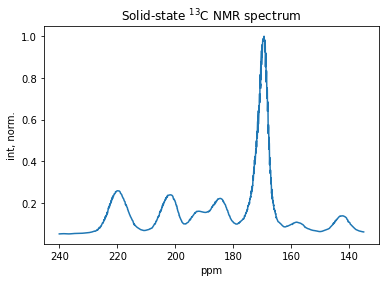

In [8]:
plt.plot(nmrdata_part['ppm'],nmrdata_part['int_n'])
plt.xlabel('ppm')
plt.ylabel('int, norm.')
plt.title('Solid-state $^{13}$C NMR spectrum')
plt.gca().invert_xaxis()

### Miscellaneous selection/plotting tasks
Perhaps we only want to look at intense features. We select only those data points with normalized intensity > 0.15.

In [9]:
nmrdata_part2 = nmrdata_part[nmrdata_part['int_n'] > 0.15]

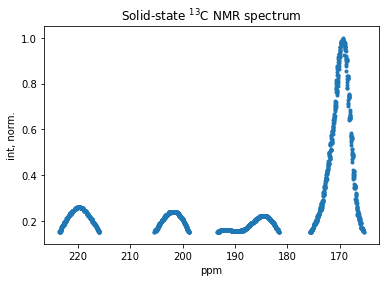

In [10]:
plt.scatter(nmrdata_part2['ppm'],nmrdata_part2['int_n'],marker='.')
plt.xlabel('ppm')
plt.ylabel('int, norm.')
plt.title('Solid-state $^{13}$C NMR spectrum')
plt.gca().invert_xaxis()